In [1]:
import numpy as np
from scipy.optimize import minimize
from groo.groo import get_root
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
import seaborn as sns

from groo.groo import get_root
rf = get_root(".hidden_root_mc")
sys.path.append(os.path.join(rf))

from models_and_funcs import *

ics = ["AIC", "AICc", "BIC", "HQC"]

In [2]:
# data acrosss four models
dp = os.path.join(rf, "data", "four_models_D")
data = pd.DataFrame()
for f in os.listdir(dp):
    data = pd.concat([data, pd.read_csv(os.path.join(dp, f))])

In [3]:
#data = pd.read_csv(os.path.join(rf, "data", "model_comparison_iter2.csv"))
#data=data.loc[data["algo"].isin(["COBYLA"]),:]

In [4]:
data.head(10)

,Unnamed: 0,noise,cutoff,true_model,algo,best_model_AIC,best_model_AICc,best_model_BIC,best_model_HQC,mean_err_AIC,mean_err_AICc,mean_err_BIC,mean_err_HQC
0,0,10,60,rw1,BFGS,rw1,rw1,rw1,rw1,7.710803,7.710803,7.710803,7.710803
1,0,10,60,rw1_att,BFGS,rw1_att,rw1_att,rw1_att,rw1_att,8.047531,8.047531,8.047531,8.047531
2,0,10,60,rw2_val,BFGS,rw1,rw1,rw1,rw1,8.067453,8.067453,8.067453,8.067453
3,0,10,60,ph_basic,BFGS,rw1,rw1,rw1,rw1,10.566386,10.566386,10.566386,10.566386
4,0,10,60,rw1,BFGS,rw1,rw1,rw1,rw1,7.978351,7.978351,7.978351,7.978351
5,0,10,60,rw1_att,BFGS,rw1_att,rw1_att,rw1_att,rw1_att,8.332007,8.332007,8.332007,8.332007
6,0,10,60,rw2_val,BFGS,rw1,rw1,rw1,rw1,8.566336,8.566336,8.566336,8.566336
7,0,10,60,ph_basic,BFGS,rw1,rw1,rw1,rw1,10.252840,10.252840,10.252840,10.252840
8,0,10,60,rw1,BFGS,rw1,rw1,rw1,rw1,7.841095,7.841095,7.841095,7.841095
9,0,10,60,rw1_att,BFGS,rw1_att,rw1_att,rw1_att,rw1_att,8.336521,8.336521,8.336521,8.336521


### Correctly identified model


correct_AIC     0.609138
correct_AICc    0.606494
correct_BIC     0.563908
correct_HQC     0.588851
dtype: float64


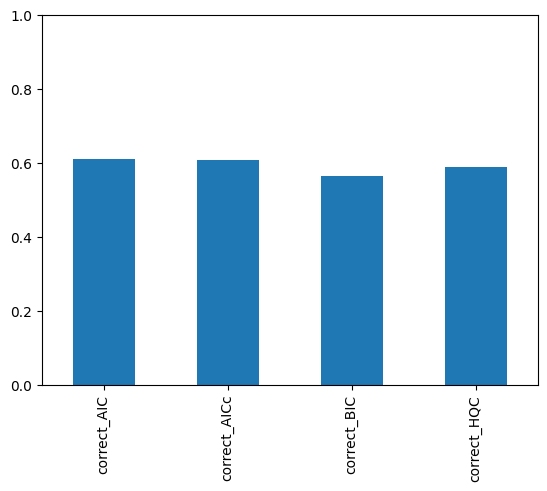

In [5]:
for ic in ics: 
    data["correct_"+ic] = data["true_model"] == data["best_model_"+ic]

data.filter(regex='^correct_').mean().plot.bar(ylim=[0,1])
print(data.filter(regex='^correct_').mean())




In [6]:
df = data.melt(id_vars=["noise", "cutoff", "true_model", "algo", "best_model_AIC", "best_model_AICc", "best_model_BIC", "best_model_HQC"], 
               value_vars=["correct_"+ic for ic in ics]) 
df["IC"] = df["variable"].str.replace("correct_", "")

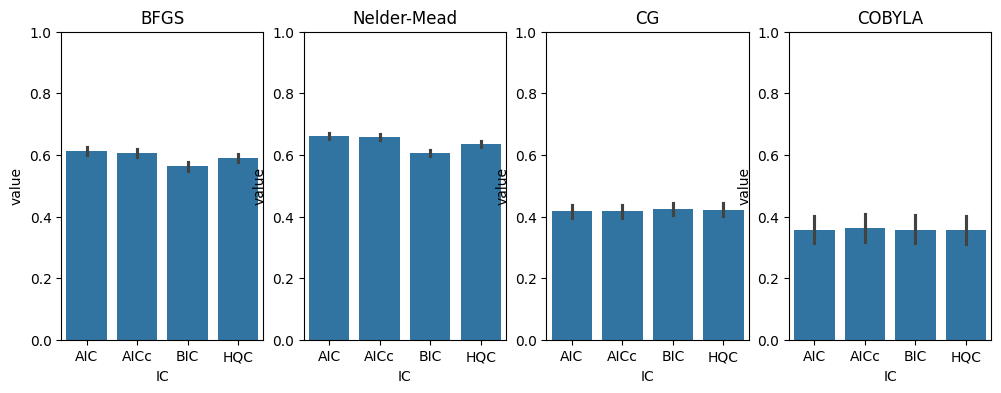

In [7]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["algo"].unique()):
    sns.barplot(data =df.loc[df["algo"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

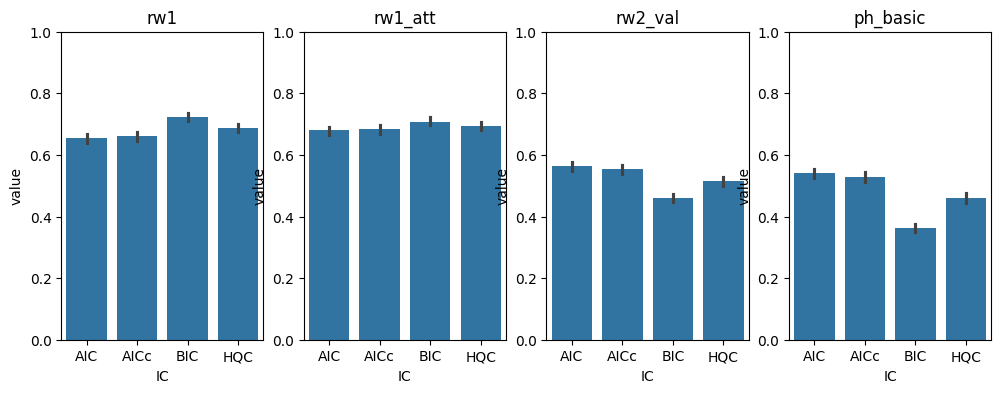

In [8]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["true_model"].unique()):
    sns.barplot(data =df.loc[df["true_model"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())




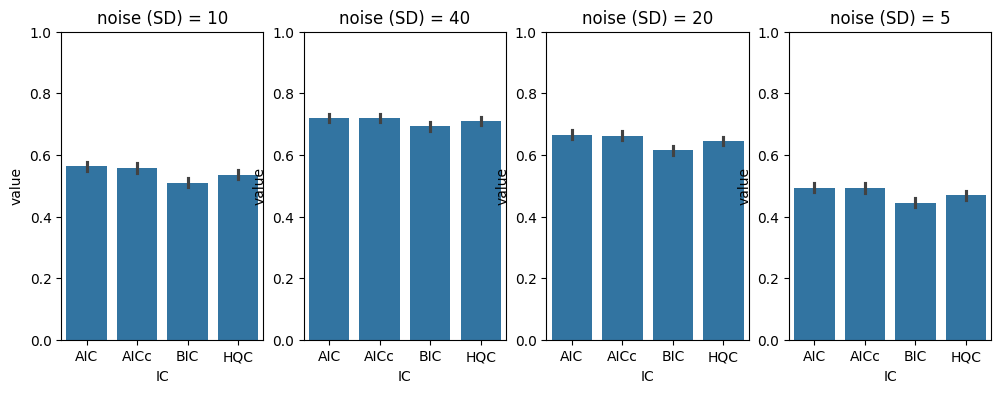

In [9]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["noise"].unique()):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())



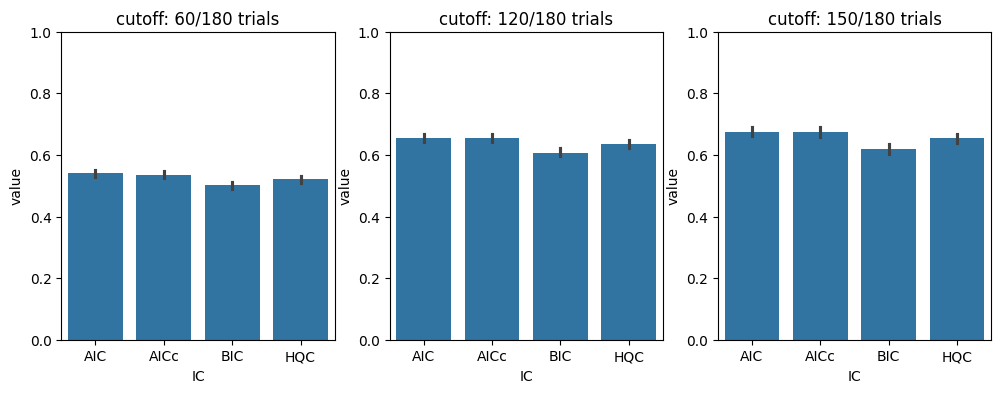

In [10]:
f, ax = plt.subplots(1,3,figsize=(12,4))
for aidx, a in enumerate([60, 120, 150]):
    sns.barplot(data =df.loc[df["cutoff"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title("cutoff: "+str(a)+"/180 trials")
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())



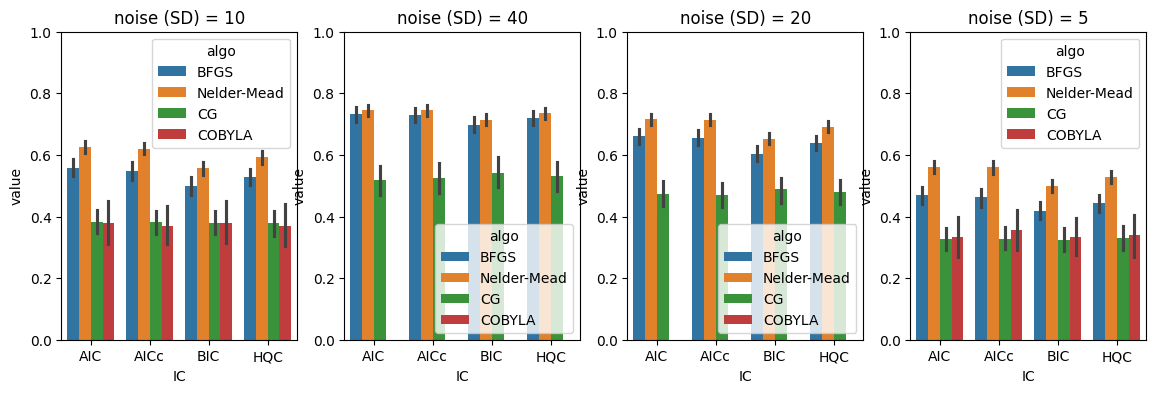

In [11]:
f, ax = plt.subplots(1,4,figsize=(14,4))
for aidx, a in enumerate(data["noise"].unique()):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", hue="algo", hue_order=df["algo"].unique(), ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())


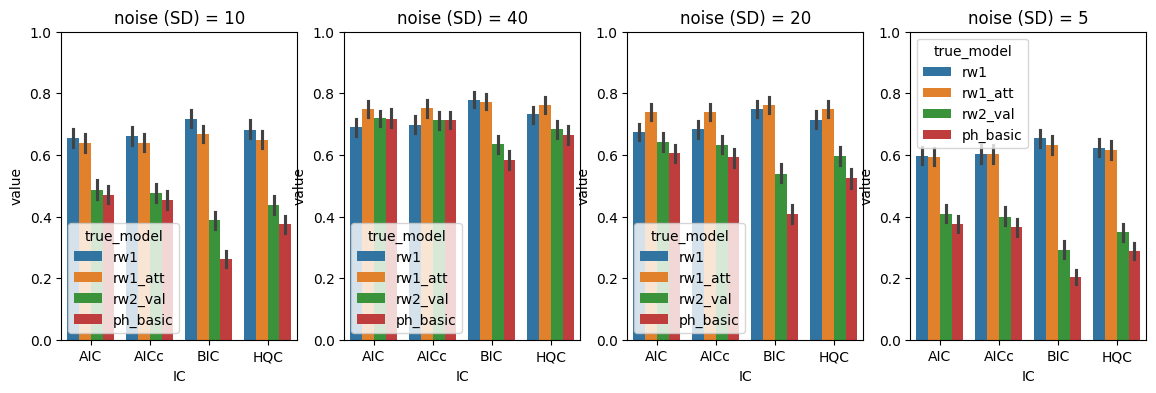

In [12]:
f, ax = plt.subplots(1,4,figsize=(14,4))
for aidx, a in enumerate(data["noise"].unique()):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", hue="true_model", hue_order=df["true_model"].unique(), ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([0,1])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

<AxesSubplot: xlabel='noise'>

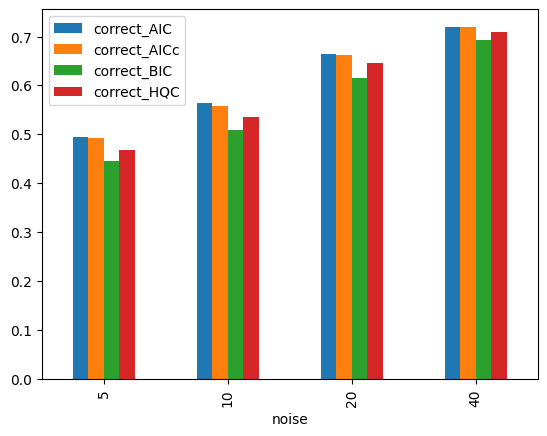

In [13]:
tdf = data.loc[:, ["noise"]+["correct_"+ic for  ic in ics]]
tdf.groupby(by="noise").mean().plot.bar()

<AxesSubplot: xlabel='cutoff'>

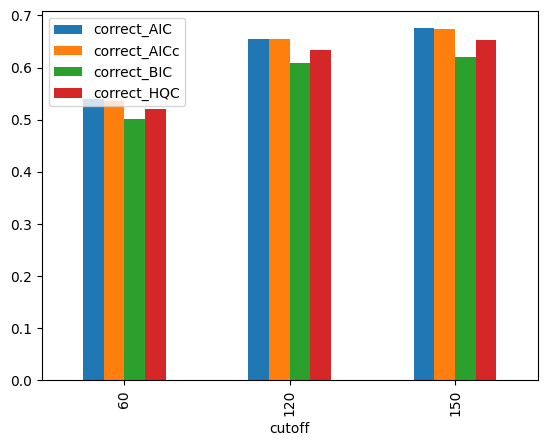

In [14]:
tdf = data.loc[:, ["cutoff"]+["correct_"+ic for  ic in ics]]
tdf.groupby(by="cutoff").mean().plot.bar()

### Mean error

In [15]:
data

,Unnamed: 0,noise,cutoff,true_model,algo,best_model_AIC,best_model_AICc,best_model_BIC,best_model_HQC,mean_err_AIC,mean_err_AICc,mean_err_BIC,mean_err_HQC,correct_AIC,correct_AICc,correct_BIC,correct_HQC
0,0,10,60,rw1,BFGS,rw1,rw1,rw1,rw1,7.710803,7.710803,7.710803,7.710803,True,True,True,True
1,0,10,60,rw1_att,BFGS,rw1_att,rw1_att,rw1_att,rw1_att,8.047531,8.047531,8.047531,8.047531,True,True,True,True
2,0,10,60,rw2_val,BFGS,rw1,rw1,rw1,rw1,8.067453,8.067453,8.067453,8.067453,False,False,False,False
3,0,10,60,ph_basic,BFGS,rw1,rw1,rw1,rw1,10.566386,10.566386,10.566386,10.566386,False,False,False,False
4,0,10,60,rw1,BFGS,rw1,rw1,rw1,rw1,7.978351,7.978351,7.978351,7.978351,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,10,150,ph_basic,Nelder-Mead,rw2_val,rw2_val,rw1,rw1,20.621371,20.621371,21.301851,21.301851,False,False,False,False
196,0,10,150,rw1,Nelder-Mead,rw1,rw1,rw1,rw1,21.869159,21.869159,21.869159,21.869159,True,True,True,True
197,0,10,150,rw1_att,Nelder-Mead,rw1_att,rw1_att,rw1_att,rw1_att,18.364121,18.364121,18.364121,18.364121,True,True,True,True
198,0,10,150,rw2_val,Nelder-Mead,rw1_att,rw1_att,rw1_att,rw1_att,18.873057,18.873057,18.873057,18.873057,False,False,False,False


In [16]:
df = data.melt(id_vars=["noise", "cutoff", "true_model", "algo", "best_model_AIC", "best_model_AICc", "best_model_BIC", "best_model_HQC"], 
               value_vars=["mean_err_"+ic for ic in ics]) 
df["IC"] = df["variable"].str.replace("mean_err_", "")

In [17]:
df = df.loc[df["value"]!=np.inf,]
df = df.loc[df["value"]<100,:]

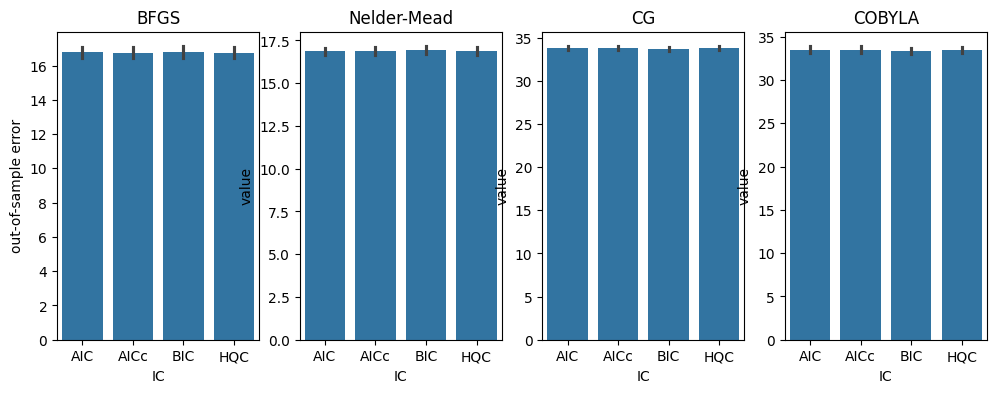

In [18]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["algo"].unique()):
    sns.barplot(data =df.loc[df["algo"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    ax[0].set_ylabel("out-of-sample error")
    ax[aidx].set_ylim([15,40])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

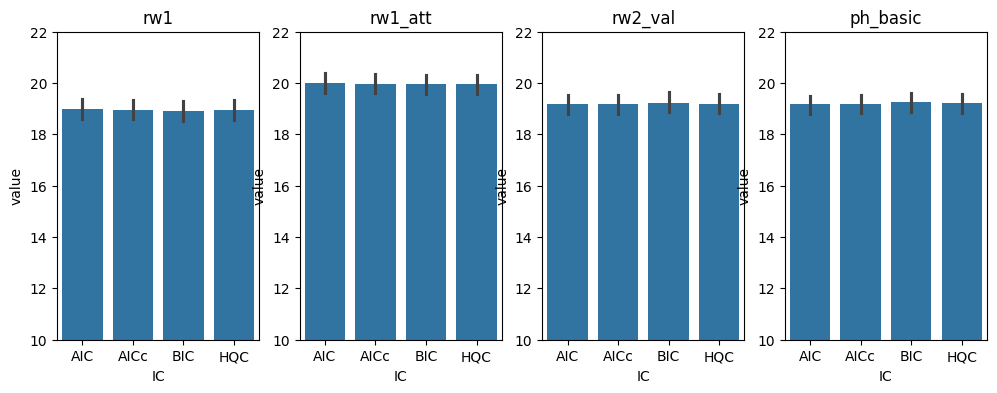

In [29]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate(data["true_model"].unique()):
    sns.barplot(data =df.loc[df["true_model"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title(a)
    #ax[0].set_ylabel("out-of-sample error")
    ax[aidx].set_ylim([10,22])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())




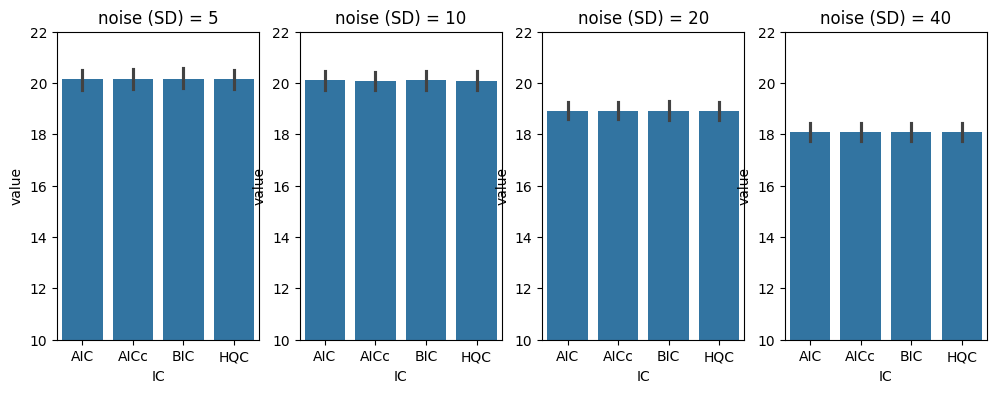

In [28]:
f, ax = plt.subplots(1,4,figsize=(12,4))
for aidx, a in enumerate([5,10,20,40]):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    ax[aidx].set_ylim([10,22])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())



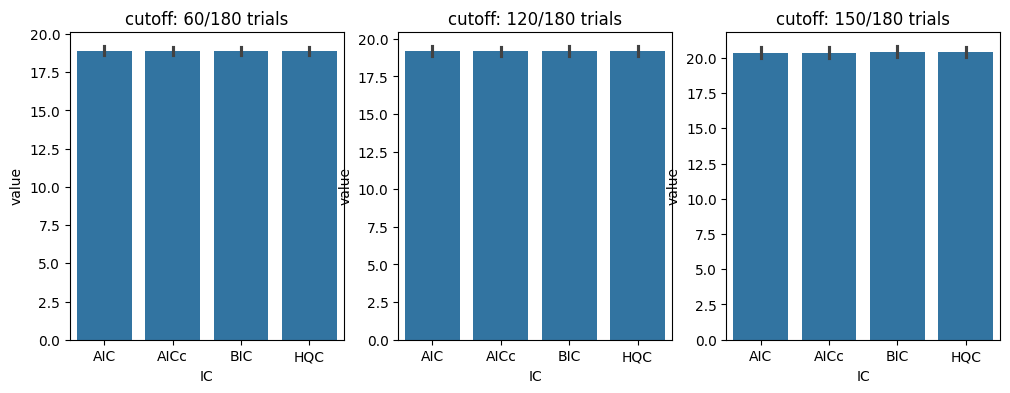

In [21]:
f, ax = plt.subplots(1,3,figsize=(12,4))
for aidx, a in enumerate([60, 120, 150]):
    sns.barplot(data =df.loc[df["cutoff"].isin([a]),:], x="IC", y="value", ax=ax[aidx])
    ax[aidx].set_title("cutoff: "+str(a)+"/180 trials")
    #ax[aidx].set_ylim([2,6])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())



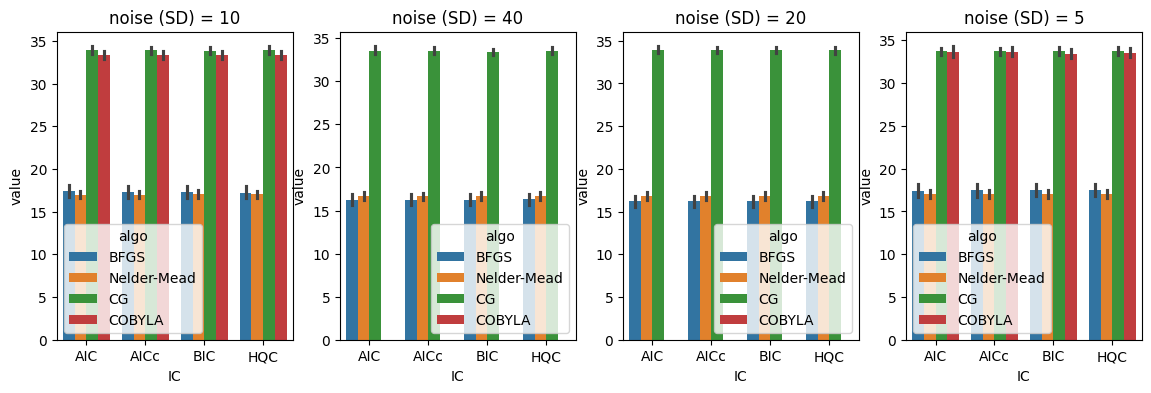

In [22]:
f, ax = plt.subplots(1,4,figsize=(14,4))
for aidx, a in enumerate(data["noise"].unique()):
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", hue="algo", hue_order=df["algo"].unique(), ax=ax[aidx])
    ax[aidx].set_title("noise (SD) = "+str(a))
    #ax[aidx].set_ylim([0,6])
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

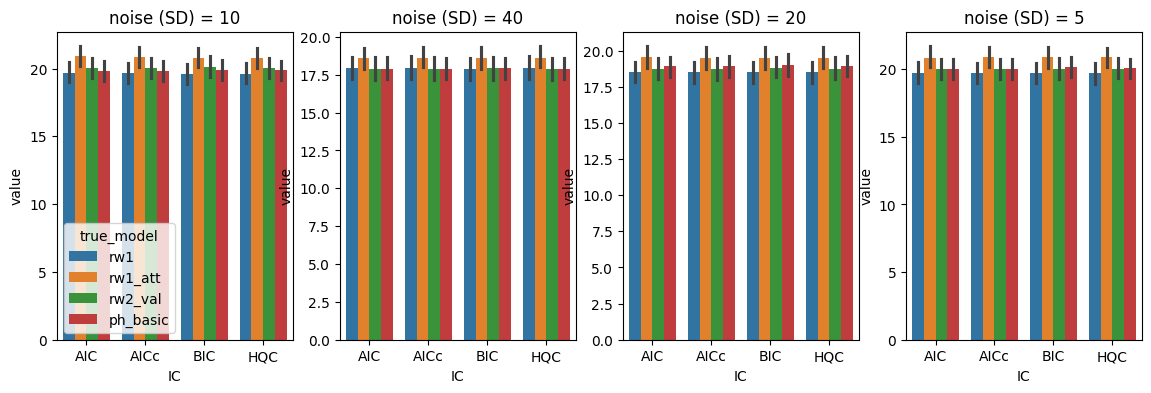

In [23]:
f, ax = plt.subplots(1,4,figsize=(14,4))
leg = True
for aidx, a in enumerate(data["noise"].unique()):
    
    sns.barplot(data =df.loc[df["noise"].isin([a]),:], x="IC", y="value", hue="true_model", hue_order=df["true_model"].unique(), ax=ax[aidx], legend=leg)
    ax[aidx].set_title("noise (SD) = "+str(a))
    #ax[aidx].set_ylim([0,6])
    leg=False
    #data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean().plot.bar(ylim=[0,1], title=a)
    #print(data.loc[data["algo"].isin([a])].filter(regex='^correct_').mean())

mean_err_AIC     16.631712
mean_err_AICc    16.630262
mean_err_BIC     16.630367
mean_err_HQC     16.633159
dtype: float64


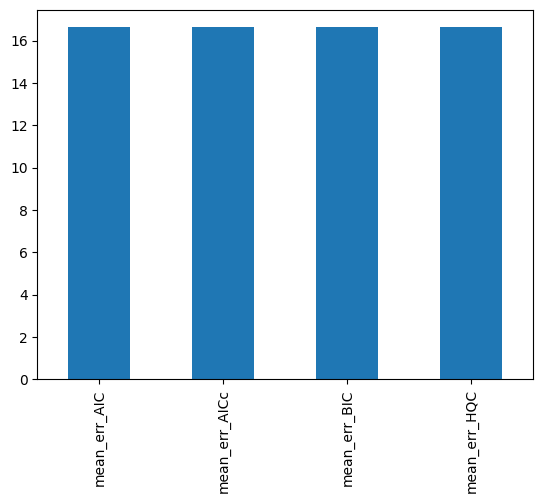

In [24]:

data.filter(regex='^mean_err_').median().plot.bar()
print(data.filter(regex='^mean_err_').median())

<AxesSubplot: xlabel='true_model'>

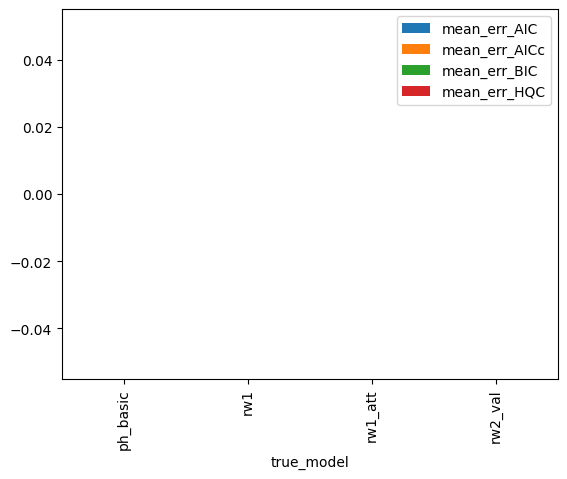

In [25]:
tdf = data.loc[:, ["true_model"]+["mean_err_"+ic for  ic in ics]]
tdf.groupby(by="true_model").mean().plot.bar()

<AxesSubplot: xlabel='noise'>

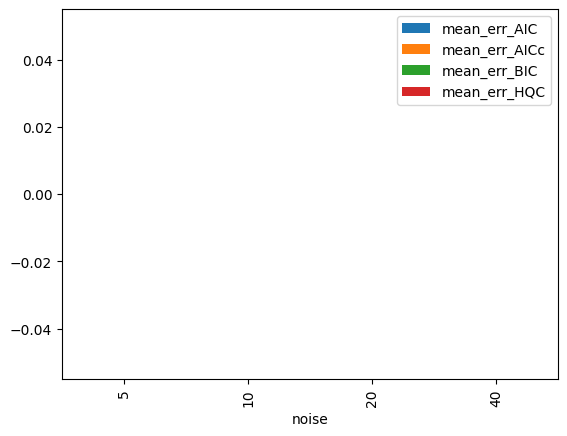

In [26]:
tdf = data.loc[:, ["noise"]+["mean_err_"+ic for  ic in ics]]
tdf.groupby(by="noise").mean().plot.bar()

In [27]:
tdf = data.loc[:, ["cutoff"]+["mean_err_"+ic for  ic in ics]]

#tdf.groupby(by="cutoff").mean().plot.bar()
bdf = tdf.melt(id_vars=["cutoff"], value_vars=["mean_err_"+ic for  ic in ics], var_name="IC", value_name="score")
bdf = bdf.loc[~np.isinf(bdf["score"]),:]
bdf=bdf.dropna()
bdf["score"] = bdf["score"].astype(float)
